In [5]:
# Load iris data from sklearn

from sklearn import datasets

iris = datasets.load_iris()

In [9]:
# Print out columns index of iris data

print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [21]:
# Print iris names

print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [13]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

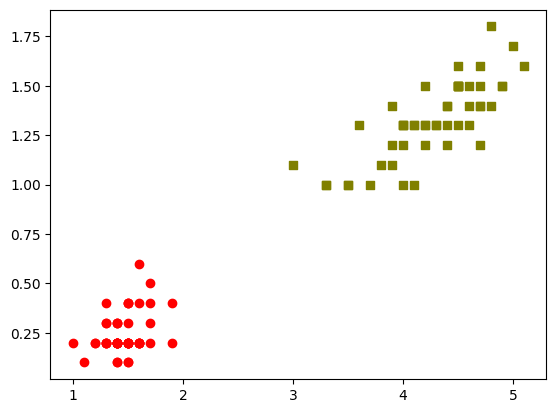

In [31]:
# Plot iris types across the width and length with different shapes and colors using matplotlib

import matplotlib.pyplot as plt

sentosa = (iris.target == 0)
versicolor = (iris.target == 1)
virginica = (iris.target == 2)

plt.scatter(iris.data[sentosa, 2], iris.data[sentosa, 3], marker='o', c='r')
plt.scatter(iris.data[versicolor, 2], iris.data[versicolor, 3], marker='s', c='olive')
# plt.scatter(iris.data[virginica, 2], iris.data[virginica, 3], marker='o', c='g')




